## Problem Statement

You can download train and test dataset from [here](https://drive.google.com/drive/folders/1F2PjpJ_u_iaD-Fs0wwcymRiVVLK34-Fu). This dataset has 4 classes. Labels for
training data are provided, you have to submit labels of test data. Feel free to use any Machine
learning or Deep learning technique.

### Imports

In [100]:
import os
import pickle
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score, precision_score,
                             recall_score, f1_score)  

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
% matplotlib inline

In [2]:
#Path for all the data files
PATH = r'C:\Users\Akshay\Desktop'

### Data Loading and Visualization

In [17]:
with open(f'{PATH}\\train_image.pkl', 'rb') as image_file:
    train_images = pickle.load(image_file)

In [18]:
print(f"Number of training samples: {len(train_images)}")

Number of training samples: 8000


In [19]:
train_labels = np.array(np.load(f'{PATH}\\train_label.pkl', allow_pickle=True))

In [31]:
Counter(train_labels)

Counter({0: 2000, 2: 2000, 3: 2000, 6: 2000})

So, we have 2000 training samples corresponding to each of the 4 classes: 0, 2, 3 and 6, hence, in total we have 8000 number of images for training. As all the classes are equally distributed, our dataset is perfectly balanced and doesn't need any kind of oversampling or undersampling.<br>
Now, lets have look at some of the images from our training data. Before, plotting we will first convert the list: `train_images` to a `numpy` array.

In [22]:
train_images = np.array(train_images)

In [25]:
print(f"Shape of train_images: {train_images.shape}")

Shape of train_images: (8000, 784)


Here, 8000 is the number of training samples. We can conclude from shape of the `train_images` that each image has been represented by a vector of length 784. So, its very much likely that each of the images were initially of size: 28 X 28 pixels and have been flattened to 28*28 i.e. 784 length of vector. Let's see if our inference is correct by plotting the samples by reshaping them to a size of 28 X 28.

In [26]:
def plot_multiple_data(n_rows, n_columns, indices):
    fig = plt.figure(figsize=(n_rows*2, n_columns*2))

    for i in range(1, n_rows*n_columns + 1):
        plt.subplot(n_rows, n_columns, i)
        plt.imshow(train_images[indices[i]].reshape(28, 28))
        plt.title(f'Label: {train_labels[indices[i]]}') #corresponding label to each of the image
    fig.tight_layout()  #for better padding amongst subplots
    plt.show()

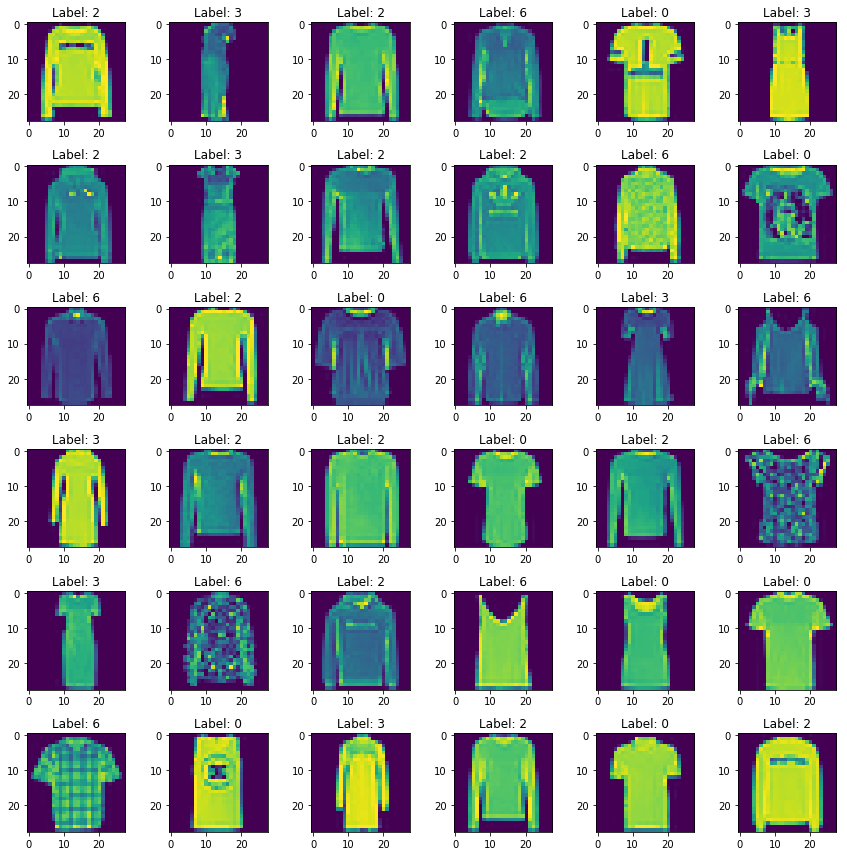

In [29]:
random_indices = np.random.permutation(train_images.shape[0]) #generate random indices for plotting
plot_multiple_data(6, 6, random_indices)

After seeing the above subplots, we can say that:
* Label 0 is for Half sleeve T-shirts/Tops
* Label 2 is for Long sleeve T-shirts or Pullovers
* Label 3 is for Dress
* Label 6 is for Shirts

### Data Pre-processing

In [34]:
#setting random seed so that every time we run random, we get the same result
np.random.seed(42)

#### Splitting the available training data into train and validation sets

In [103]:
Train_x, Val_x, Train_y, Val_y = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)

In [104]:
print(f"Shape of Training features: {Train_x.shape}")
print(f"Shape of Training labels: {Train_y.shape}")
print(f"Shape of Validation features: {Val_x.shape}")
print(f"Shape of Validation labels: {Val_y.shape}")  

Shape of Training features: (7200, 784)
Shape of Training labels: (7200,)
Shape of Validation features: (800, 784)
Shape of Validation labels: (800,)


#### Reshaping the Train_x and Val_x

In [105]:
Train_x = Train_x.reshape((-1, 28, 28, 1))
Val_x = Val_x.reshape((-1, 28, 28, 1))

In [106]:
print(f"Shape of Training features: {Train_x.shape}")
print(f"Shape of Validation features: {Val_x.shape}")

Shape of Training features: (7200, 28, 28, 1)
Shape of Validation features: (800, 28, 28, 1)


#### Normalizing by scaling down pixel values to the range [0, 1]

In [107]:
Train_x = Train_x.astype("float32")/255
Val_x = Val_x.astype("float32")/255

#### One-hot encoding Labels

In [114]:
Train_y = pd.get_dummies(Train_y)
Val_y = pd.get_dummies(Val_y)

In [115]:
print(f"Shape of Training labels: {Train_y.shape}")
print(f"Shape of Validation labels: {Val_y.shape}")

Shape of Training labels: (7200, 4)
Shape of Validation labels: (800, 4)


In [116]:
Train_y.head()

,0,2,3,6
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,1,0,0


In [121]:
model = Sequential()

# Try 32 fliters first then 64
model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (28,28,1), activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Dropout(0.50))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Dropout(0.50))
# cnn_model.add(Conv2D(32,3, 3, activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(units = 32, activation = "relu"))
model.add(Dense(units = 4, activation = "softmax"))

In [122]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 64)          0         
__________

In [123]:
model.compile(loss = 'categorical_crossentropy', optimizer=Adam(lr=0.001), metrics =['accuracy'])

In [124]:
epochs = 50
batch_size=64
history = model.fit(Train_x, Train_y,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 2,
                    validation_data = (Val_x, Val_y))

Train on 7200 samples, validate on 800 samples
Epoch 1/50
 - 25s - loss: 0.9134 - acc: 0.5903 - val_loss: 0.6981 - val_acc: 0.6913
Epoch 2/50
 - 25s - loss: 0.6684 - acc: 0.7049 - val_loss: 0.6096 - val_acc: 0.7412
Epoch 3/50
 - 25s - loss: 0.5885 - acc: 0.7576 - val_loss: 0.5666 - val_acc: 0.7837
Epoch 4/50
 - 25s - loss: 0.5422 - acc: 0.7760 - val_loss: 0.5287 - val_acc: 0.7963
Epoch 5/50
 - 25s - loss: 0.5014 - acc: 0.8015 - val_loss: 0.4837 - val_acc: 0.8150
Epoch 6/50
 - 25s - loss: 0.4582 - acc: 0.8182 - val_loss: 0.4501 - val_acc: 0.8225
Epoch 7/50
 - 25s - loss: 0.4369 - acc: 0.8244 - val_loss: 0.4478 - val_acc: 0.8225
Epoch 8/50
 - 25s - loss: 0.4256 - acc: 0.8293 - val_loss: 0.4227 - val_acc: 0.8400
Epoch 9/50
 - 25s - loss: 0.4101 - acc: 0.8347 - val_loss: 0.4085 - val_acc: 0.8450
Epoch 10/50
 - 25s - loss: 0.3936 - acc: 0.8419 - val_loss: 0.4124 - val_acc: 0.8350
Epoch 11/50
 - 25s - loss: 0.3841 - acc: 0.8457 - val_loss: 0.4167 - val_acc: 0.8287
Epoch 12/50
 - 25s - loss: 